In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
df= pd.read_csv('Big_Mart_Sales.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [7]:
df[df.Item_Visibility == 0] ### 526

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


In [8]:
df.Item_Visibility = np.where(df.Item_Visibility == 0,df.Item_Visibility.median(),df.Item_Visibility)

In [9]:
df.Item_Weight.median()

12.6

In [10]:
df.Item_Weight = np.where(df.Item_Weight.isnull(),12.6,df.Item_Weight) ## imputing nan with median

In [11]:
for i in df.columns:
    if(df[i].dtype == 'O'):
        print(i,": \n\n",df[i].unique(),"\n")

Item_Identifier : 

 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05'] 

Item_Fat_Content : 

 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'] 

Item_Type : 

 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] 

Outlet_Identifier : 

 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] 

Outlet_Size : 

 ['Medium' nan 'High' 'Small'] 

Outlet_Location_Type : 

 ['Tier 1' 'Tier 3' 'Tier 2'] 

Outlet_Type : 

 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] 



In [12]:
df.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
df.Outlet_Size = np.where(df.Outlet_Size.isnull(),'Medium',df.Outlet_Size) ## imputing nan with Medium

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
### Categorical Variables

category = []

for i in df.columns:
    if(df[i].dtype == 'O'):
        print(i)
        category.append(i)
        
        
category = category[1:] ### as Item_Identifier is not required

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


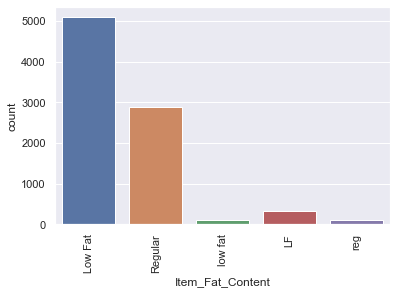

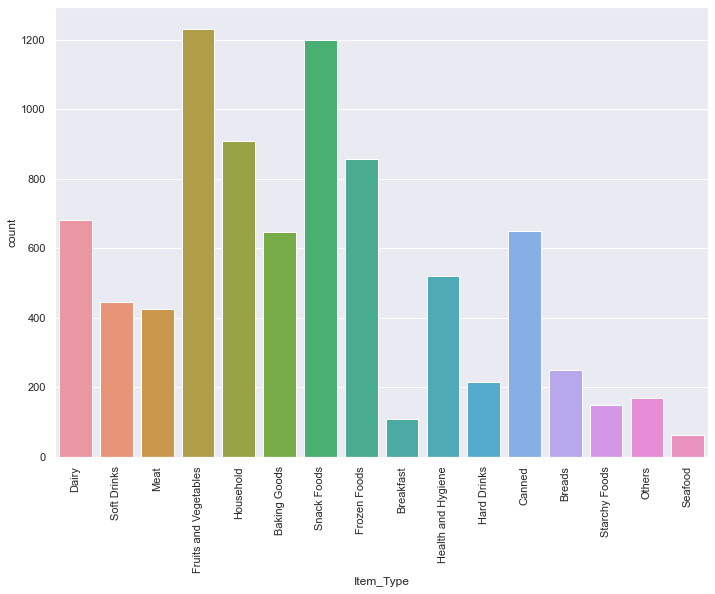

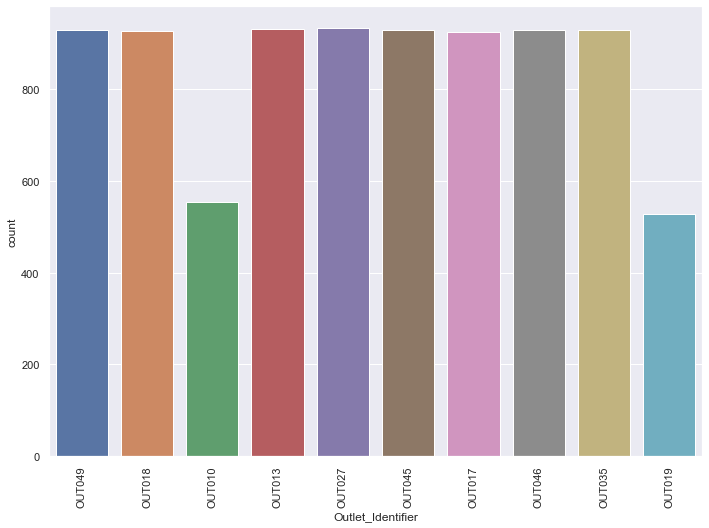

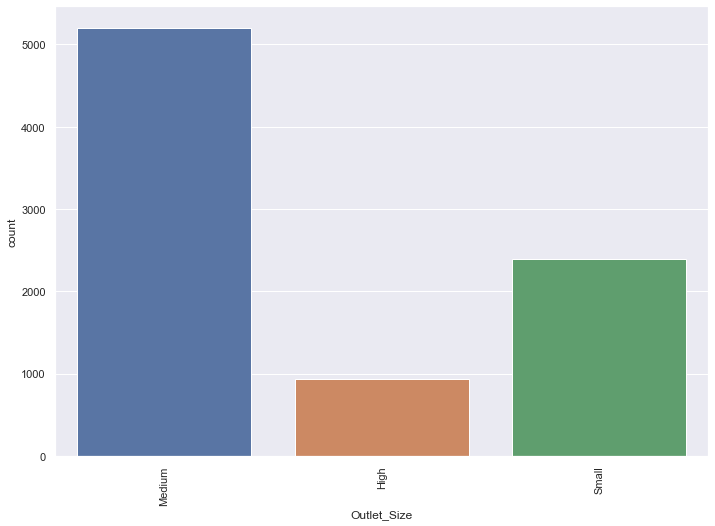

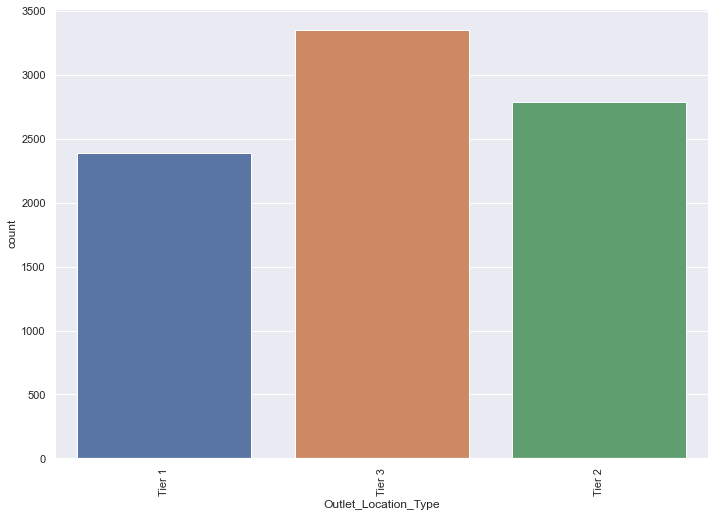

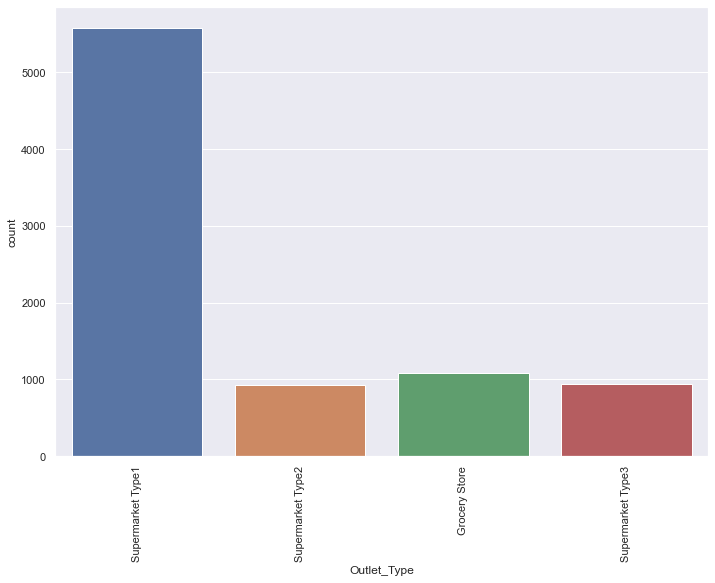

In [17]:
for i in category:
    plt.figure()     ### for ploting figures more than one
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    sns.countplot(df[i])
    plt.xticks(rotation=90)


In [18]:
for i in category:
    print(df[i].value_counts(),"\n")

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64 

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64 

Supermarket Type1    5

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


[1999 2009 1998 1987 1985 2002 2007 1997 2004] 

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

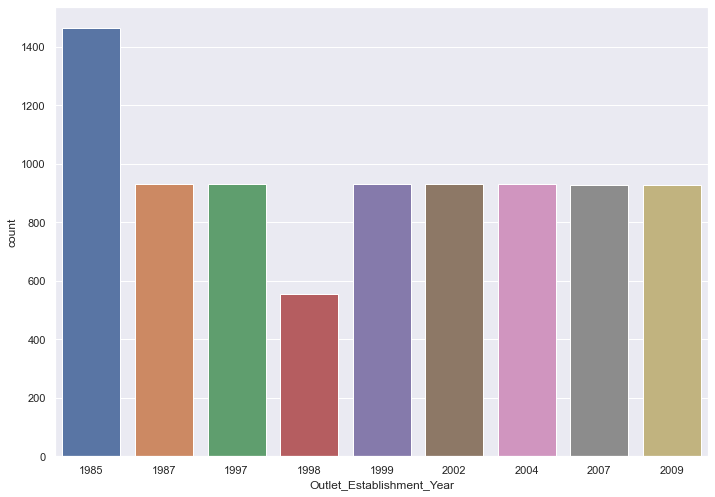

In [20]:
print(df.Outlet_Establishment_Year.unique(),"\n")
print(df.Outlet_Establishment_Year.value_counts())
sns.countplot(df.Outlet_Establishment_Year)

In [21]:
df.Outlet_Establishment_Year.dtype

dtype('int64')

In [22]:
df.Outlet_Establishment_Year = df.Outlet_Establishment_Year.apply(lambda x: 2013-x)

[14  4 15 26 28 11  6 16  9] 

28    1463
26     932
14     930
9      930
16     930
11     929
4      928
6      926
15     555
Name: Outlet_Establishment_Year, dtype: int64


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

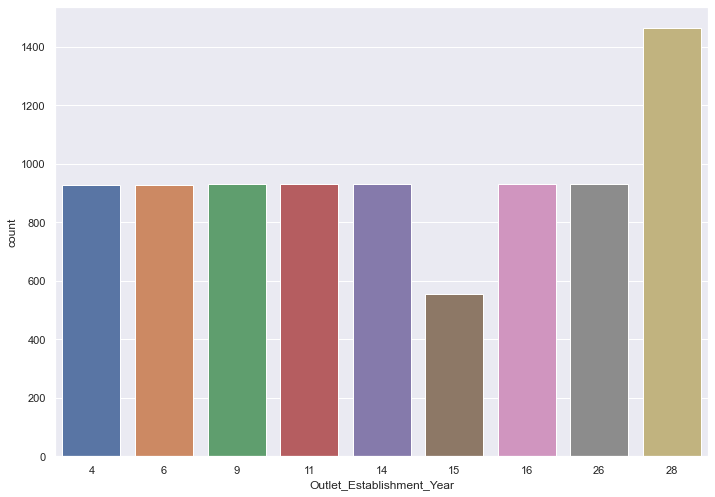

In [23]:
print(df.Outlet_Establishment_Year.unique(),"\n")
print(df.Outlet_Establishment_Year.value_counts())
sns.countplot(df.Outlet_Establishment_Year)

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

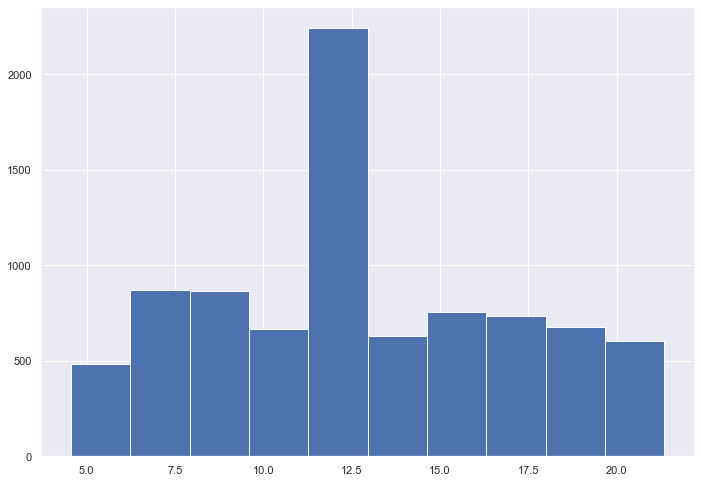

In [24]:
plt.hist(df['Item_Weight'],bins=10)

<AxesSubplot:xlabel='Item_Weight'>

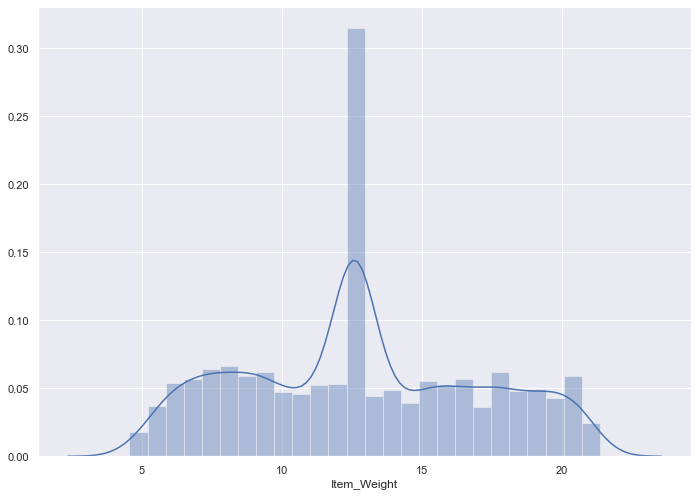

In [25]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:>

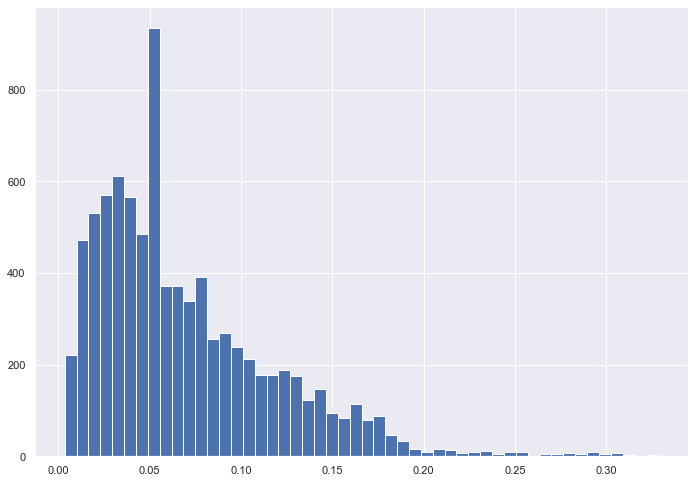

In [26]:
df.Item_Visibility.hist(bins=50)

<AxesSubplot:xlabel='Item_Visibility'>

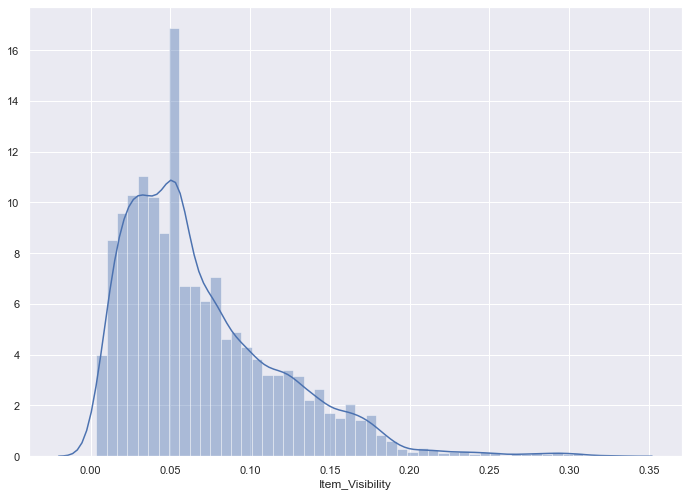

In [27]:
sns.distplot(df.Item_Visibility)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

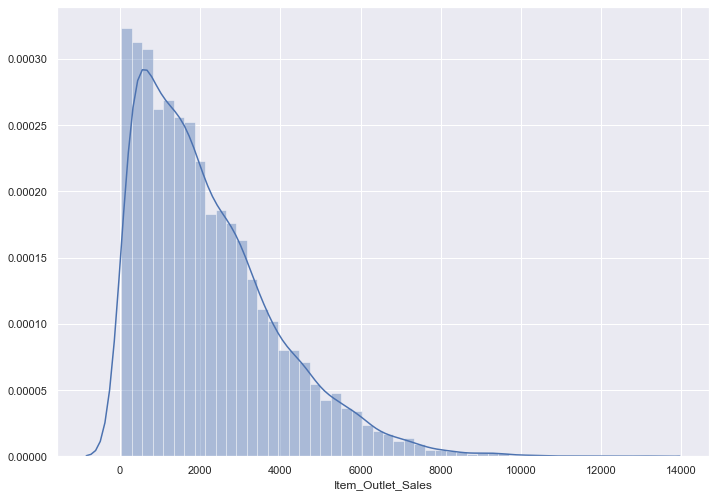

In [28]:
sns.distplot(df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Outlet_Sales'>

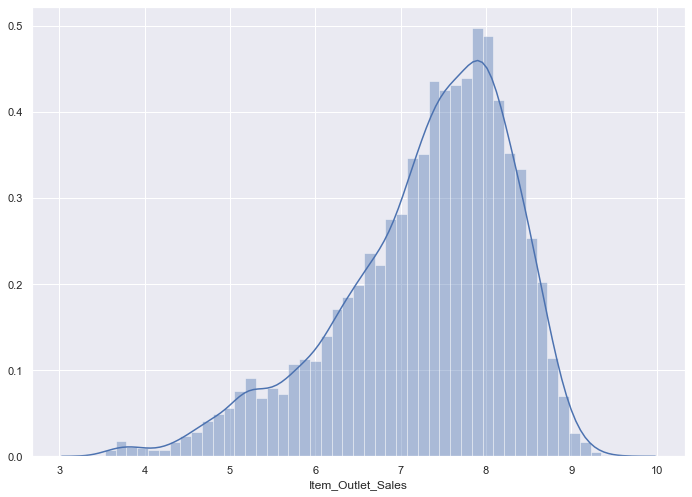

In [29]:
#### transformation

df.Item_Outlet_Sales = np.log(1+df.Item_Outlet_Sales)
sns.distplot(df.Item_Outlet_Sales)

# df_scaled = 1/df.Item_Outlet_Sales

# df_scaled = df.Item_Outlet_Sales**(1/1.2)

In [30]:
df.groupby(['Item_Fat_Content'])['Item_MRP'].sum()

Item_Fat_Content
LF          43857.1062
Low Fat    717390.8394
Regular    409413.1214
low fat     15071.7328
reg         15948.6810
Name: Item_MRP, dtype: float64

In [31]:
df.groupby(['Item_Fat_Content'])['Item_Weight'].sum()

Item_Fat_Content
LF          4034.435
Low Fat    65612.100
Regular    36654.145
low fat     1408.175
reg         1499.920
Name: Item_Weight, dtype: float64

In [32]:
df.groupby(['Item_Type'])['Item_MRP'].sum()

Item_Type
Baking Goods              81894.7364
Breads                    35379.1198
Breakfast                 15596.6966
Canned                    90706.7270
Dairy                    101276.4596
Frozen Foods             118558.8814
Fruits and Vegetables    178124.0810
Hard Drinks               29334.6766
Health and Hygiene        68025.8388
Household                135976.5254
Meat                      59449.8638
Others                    22451.8916
Seafood                    9077.8700
Snack Foods              175433.9204
Soft Drinks               58514.1650
Starchy Foods             21880.0274
Name: Item_MRP, dtype: float64

In [33]:
df.groupby(['Item_Type'])['Item_Weight'].sum()

Item_Type
Baking Goods              7991.730
Breads                    2906.975
Breakfast                 1400.970
Canned                    8018.775
Dairy                     9060.755
Frozen Foods             10977.350
Fruits and Vegetables    16159.840
Hard Drinks               2476.860
Health and Hygiene        6785.195
Household                12061.615
Meat                      5428.245
Others                    2301.100
Seafood                    803.995
Snack Foods              15503.225
Soft Drinks               5325.550
Starchy Foods             2006.595
Name: Item_Weight, dtype: float64

In [34]:
df.groupby(['Outlet_Size'])['Item_MRP'].sum()

Outlet_Size
High      131809.0156
Medium    730847.6060
Small     339024.8592
Name: Item_MRP, dtype: float64

In [35]:
df.groupby(['Outlet_Type'])['Item_MRP'].sum()

Outlet_Type
Grocery Store        151939.1470
Supermarket Type1    787549.8868
Supermarket Type2    131477.7724
Supermarket Type3    130714.6746
Name: Item_MRP, dtype: float64

In [36]:
##### Combining LOW FATS and REGULARS

dictionary = {'LF':'Low Fat', 'reg':'Regular','low fat':'Low Fat','Low Fat':'Low Fat','Regular':'Regular'}

df.Item_Fat_Content = df.Item_Fat_Content.map(dictionary)

In [37]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

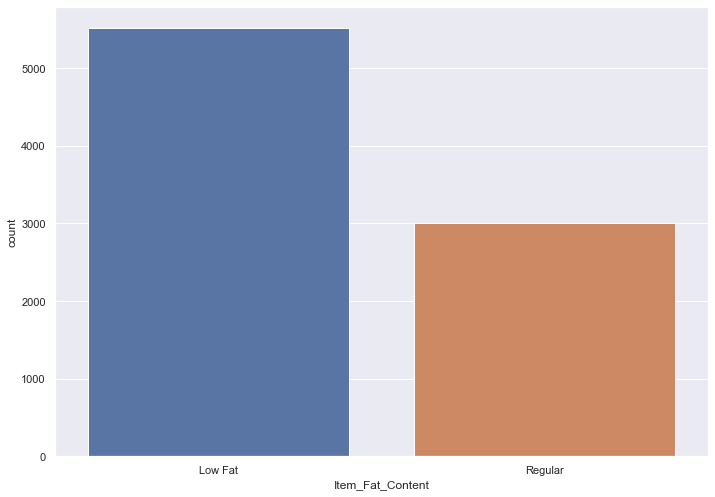

In [38]:
sns.countplot(df.Item_Fat_Content)

In [39]:
### Extracting the first 2 letters of Item_Identifier


## FD = Food
## NC = Non Consumable
## DR = Drinks

df['Item_Category'] = df.Item_Identifier.apply(lambda x: x[:2])

In [40]:
dictionary = {'FD':'Food','NC':'Non Consumable','DR': 'Drinks'}
df.Item_Category = df.Item_Category.map(dictionary)
df.Item_Category

0                 Food
1               Drinks
2                 Food
3                 Food
4       Non Consumable
             ...      
8518              Food
8519              Food
8520    Non Consumable
8521              Food
8522            Drinks
Name: Item_Category, Length: 8523, dtype: object

In [41]:
df.Item_Category.value_counts()

Food              6125
Non Consumable    1599
Drinks             799
Name: Item_Category, dtype: int64

<AxesSubplot:xlabel='Item_Category', ylabel='count'>

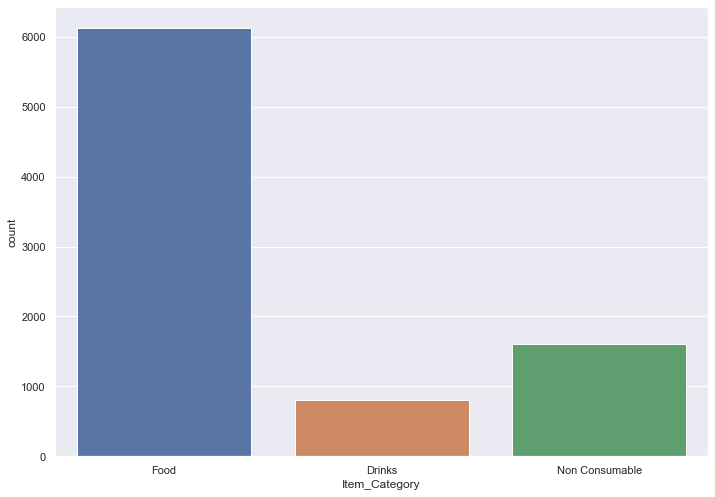

In [42]:
sns.countplot(df.Item_Category)

In [43]:
df.Outlet_Identifier

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [44]:
len(df.Outlet_Identifier.value_counts())

10

In [45]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,8.225808,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,6.096776,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,7.648868,Food
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,6.597664,Food
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,6.903451,Non Consumable


In [46]:
df.drop(['Item_Identifier'],inplace=True,axis=1)

In [47]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Category
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,8.225808,Food
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,6.096776,Drinks
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,7.648868,Food
3,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,15,Medium,Tier 3,Grocery Store,6.597664,Food
4,8.93,Low Fat,0.053931,Household,53.8614,OUT013,26,High,Tier 3,Supermarket Type1,6.903451,Non Consumable


In [48]:
df.Item_Fat_Content.dtype

dtype('O')

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df.Item_Weight = sc.fit_transform(df.Item_Weight.values.reshape(-1,1)) ### for converting 1D to 2D array

In [50]:
## scaling all the numerical features


df.Item_Visibility = sc.fit_transform(df.Item_Visibility.values.reshape(-1,1))
df.Item_MRP = sc.fit_transform(df.Item_MRP.values.reshape(-1,1))
df.Item_Weight = sc.fit_transform(df.Item_Weight.values.reshape(-1,1))
df.Outlet_Establishment_Year = sc.fit_transform(df.Outlet_Establishment_Year.values.reshape(-1,1))
df.Item_Outlet_Sales = sc.fit_transform(df.Item_Outlet_Sales.values.reshape(-1,1))

In [51]:
df_new = pd.get_dummies(df)

In [52]:
df_new

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Category_Drinks,Item_Category_Food,Item_Category_Non Consumable
0,-0.831187,-1.092518,1.747454,-0.139541,0.914094,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,-1.630810,-1.026432,-1.489023,-1.334103,-1.183160,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1.108727,-1.077939,0.010040,-0.139541,0.345766,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.510904,-0.317641,0.660050,-0.020085,-0.689748,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4,-0.918719,-0.317641,-1.399220,1.293934,-0.388525,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.407246,-0.259297,1.180783,1.293934,0.622686,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
8519,-1.048835,-0.459767,-0.527301,-0.497909,-0.972689,0,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
8520,-0.523639,-0.701047,-0.897208,-0.736822,-0.209529,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
8521,-1.325628,1.549609,-0.607977,-1.334103,0.219905,0,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


<AxesSubplot:>

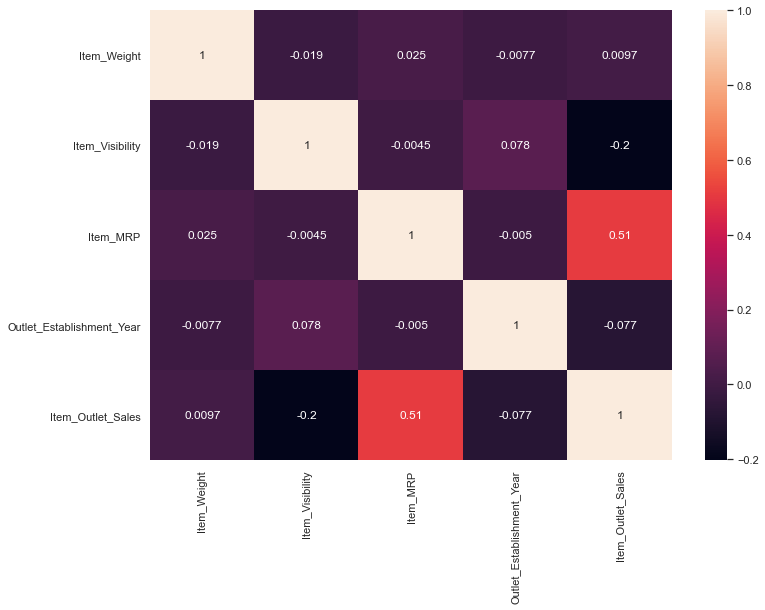

In [53]:
sns.heatmap(df.corr(),annot=True)

## Train and Test

In [54]:
X = df_new.drop('Item_Outlet_Sales',axis=1)
y = df_new['Item_Outlet_Sales']

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 12,test_size = .3)

In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
Y_pred = lr.predict(x_train)

In [58]:
y_pred = lr.predict(x_test)

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print('Train Data:\n')
print('Mean Absolute Error: ',mean_absolute_error(y_train,Y_pred))
print('Mean Squared Error: ',mean_squared_error(y_train,Y_pred))
print('Root Mean Sqaure Error: ',np.sqrt(mean_absolute_error(y_train,Y_pred)))
print('r2 Score: ',r2_score(y_train,Y_pred))

print('Test Data:\n')
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Sqaure Error: ',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('r2 Score: ',r2_score(y_test,y_pred))

Train Data:

Mean Absolute Error:  0.4625872869826892
Mean Squared Error:  0.34910467130152845
Root Mean Sqaure Error:  0.6801376970751505
r2 Score:  0.6503536912845371
Test Data:

Mean Absolute Error:  0.4616482689629399
Mean Squared Error:  0.35107626409591763
Root Mean Sqaure Error:  0.6794470317566631
r2 Score:  0.6501466659753707


In [60]:
### Lasso Regression

la = Lasso()
la.fit(x_train,y_train)

Y_pred = la.predict(x_train)
y_pred = la.predict(x_test)

print('Train Data:\n')
print('Mean Absolute Error: ',mean_absolute_error(y_train,Y_pred))
print('Mean Squared Error: ',mean_squared_error(y_train,Y_pred))
print('Root Mean Sqaure Error: ',np.sqrt(mean_absolute_error(y_train,Y_pred)))
print('r2 Score: ',r2_score(y_train,Y_pred))

print('Test Data:\n')
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Sqaure Error: ',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('r2 Score: ',r2_score(y_test,y_pred))


Train Data:

Mean Absolute Error:  0.791276409216997
Mean Squared Error:  0.9984508990930738
Root Mean Sqaure Error:  0.8895371882147464
r2 Score:  0.0
Test Data:

Mean Absolute Error:  0.7896769588296874
Mean Squared Error:  1.0036652908827186
Root Mean Sqaure Error:  0.8886376982942414
r2 Score:  -0.0001691489008910363


In [61]:
### Ridge Regression

rd = Ridge()

rd.fit(x_train,y_train)


Y_pred = rd.predict(x_train)
y_pred = rd.predict(x_test)

print('Train Data:\n')
print('Mean Absolute Error: ',mean_absolute_error(y_train,Y_pred))
print('Mean Squared Error: ',mean_squared_error(y_train,Y_pred))
print('Root Mean Sqaure Error: ',np.sqrt(mean_absolute_error(y_train,Y_pred)))
print('r2 Score: ',r2_score(y_train,Y_pred))

print('Test Data:\n')
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',mean_squared_error(y_test,y_pred))
print('Root Mean Sqaure Error: ',np.sqrt(mean_absolute_error(y_test,y_pred)))
print('r2 Score: ',r2_score(y_test,y_pred))


Train Data:

Mean Absolute Error:  0.41069061320922934
Mean Squared Error:  0.2798061876258866
Root Mean Sqaure Error:  0.6408514751556942
r2 Score:  0.7197596918586143
Test Data:

Mean Absolute Error:  0.4080840274688373
Mean Squared Error:  0.2775007864319863
Root Mean Sqaure Error:  0.6388145485732438
r2 Score:  0.7234658527038373


## Cross validation

In [73]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(lr,X,y,scoring='r2',cv=5)
print(score)
score.mean()

[0.72045063 0.71003643 0.7084366  0.71486354 0.73993519]


0.7187444791063856

In [66]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(la,X,y,scoring='r2')
score

array([-7.56845778e-05, -6.56272490e-04, -1.72803056e-03, -4.05074459e-05,
       -8.54097726e-04])

In [74]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(rd,X,y,scoring='r2',cv=5)
print(score)
score.mean()

[0.72045034 0.71003331 0.70844498 0.71493283 0.73993071]


0.7187584331005867